# Basic Hessian AD

For many optimizaton problems, the hessian is useful to speed up convergence or provide approximations through the Taylor expansion. Since the Hessian is sometimes intractible analytically, automatic differentiation is an important and useful tool for getting the Hessian of a function.

In [1]:
import ad
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Univariate Example

First we start with an easy univariate example, where we know the closed form solution already. Consider the function

$$f(x) = x^2 + \frac{1}{x + 1} - 5x$$

The Hessian in this case is just one variable, which can be analytically solved to be

$$ \frac{d^2}{dx^2} f(x) = \frac{2}{(x+1)^3}+2$$

Let's check whether or not our AD package gives us the correct answer!

In [2]:
x = ad.Variable()
f = x * x + 1 / (x + 1) - 5 * x

x_vals = list(np.linspace(0, 6, 1000))
fx_vals = [f.eval({x: i}) for i in x_vals]
fppx_vals = [f.hessian({x: i}) for i in x_vals]

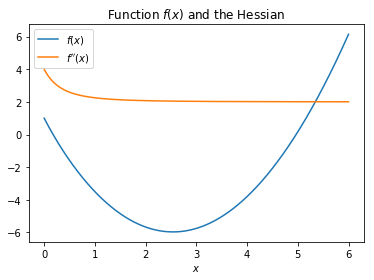

In [3]:
plt.title(r"Function $f(x)$ and the Hessian")
plt.xlabel(r"$x$")
plt.plot(x_vals, fx_vals)
plt.plot(x_vals, fppx_vals)

plt.legend([r'$f(x)$', r"$f''(x)$"])
plt.show()

This matches our analytic form of the Hessian, which is good!

## Multivariate Example

Now let's do a multivariate example. In order to be able to verify our results, we will make a function of two variables so we can easily get the analytical form of the Hessian. However, we can do the exact same thing for more than two variables. Let us consider the function:

$$f(x, y) = x^3 + \cos(xy) + \frac{1}{y - 1} + x^y$$

Then, our Hessian (analytic form given by Mathematica) will be:

$$\mathsf{Hessian} = 
\begin{bmatrix}
1
\end{bmatrix}
$$

In [ ]:
x = ad.Variable()
y = ad.Variable()

f = x * x * x + 